<a href="https://colab.research.google.com/github/Rodricsls/Bee_Project_SP/blob/main/The_BeeImage_Dataset_Annotated_Honey_Bee_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle - Key



In [ ]:
# Cell used to link Kaggle API and Google Colab
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


#Libraries


In [ ]:
#Data analysis libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

#Graphic Charts libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Neuronal networks libraries
import tensorflow as tf

#Miscellaneous Libraries
import os
import datetime

#Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE




# 1)Data Preparation

## Downloading Data


In [ ]:
# Downloading Dataset as ZIP
# Provide the API command here, don't forget to add the exclamation symbol at the beginning!
# The API command can be obtained in the Kaggle's page → Dataset Page → 3 dots (next to the black download button) → COPY API COMMAND
!kaggle datasets download -d jenny18/honey-bee-annotated-images

# Unzipping Dataset
!unzip honey-bee-annotated-images.zip -d data

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: data/bee_imgs/bee_imgs/003_250.png  
  inflating: data/bee_imgs/bee_imgs/003_251.png  
  inflating: data/bee_imgs/bee_imgs/003_252.png  
  inflating: data/bee_imgs/bee_imgs/003_253.png  
  inflating: data/bee_imgs/bee_imgs/003_254.png  
  inflating: data/bee_imgs/bee_imgs/003_255.png  
  inflating: data/bee_imgs/bee_imgs/003_256.png  
  inflating: data/bee_imgs/bee_imgs/003_257.png  
  inflating: data/bee_imgs/bee_imgs/003_258.png  
  inflating: data/bee_imgs/bee_imgs/003_259.png  
  inflating: data/bee_imgs/bee_imgs/003_260.png  
  inflating: data/bee_imgs/bee_imgs/003_261.png  
  inflating: data/bee_imgs/bee_imgs/003_262.png  
  inflating: data/bee_imgs/bee_imgs/003_263.png  
  inflating: data/bee_imgs/bee_imgs/003_264.png  
  inflating: data/bee_imgs/bee_imgs/003_265.png  
  inflating: data/bee_imgs/bee_imgs/003_266.png  
  inflating: data/bee_imgs/bee_imgs/003_267.png  
  inflating: data/bee_imgs/bee_imgs/003

## CSV

In [ ]:
# Loading Dataset and have a glimpse about it
raw_dataset = pd.read_csv("data/bee_data.csv")

# Brief Statistical Summary of the dataset
raw_dataset

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
...,...,...,...,...,...,...,...,...,...
5167,027_011.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,True,worker
5168,027_007.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,True,worker
5169,027_013.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,False,worker
5170,027_012.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,False,worker


## Missing Values


In [ ]:
clean_dataset = raw_dataset.copy()
print("Coming Soon Values: ",len(clean_dataset[clean_dataset['subspecies'] == "-1"]))

Coming Soon Values:  428


In [ ]:
clean_dataset = clean_dataset[clean_dataset['subspecies'] != "-1"]
print(clean_dataset['subspecies'].unique())
clean_dataset

['Italian honey bee' 'VSH Italian honey bee' 'Carniolan honey bee'
 'Russian honey bee' '1 Mixed local stock 2' 'Western honey bee']


,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
74,017_029.png,8/6/18,13:21,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
75,017_015.png,8/6/18,13:21,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
76,017_001.png,8/6/18,13:21,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
77,017_000.png,8/6/18,13:21,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
78,017_014.png,8/6/18,13:21,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
...,...,...,...,...,...,...,...,...,...
5157,033_087.png,8/21/18,9:30,"Des Moines, IA, USA",50315,Western honey bee,healthy,False,worker
5158,033_093.png,8/21/18,9:30,"Des Moines, IA, USA",50315,Western honey bee,healthy,False,worker
5159,033_092.png,8/21/18,9:30,"Des Moines, IA, USA",50315,Western honey bee,healthy,False,worker
5160,033_096.png,8/21/18,9:30,"Des Moines, IA, USA",50315,Western honey bee,healthy,False,worker


In [ ]:
train, test = train_test_split(clean_dataset, test_size=0.2)

print(train.shape)
print(test.shape)

(3795, 9)
(949, 9)


In [ ]:
print(train[train['health'] == "healthy"].shape)
print(train[train['health'] != "healthy"].shape)

print(test[test['health'] == "healthy"].shape)
print(test[test['health'] != "healthy"].shape)

(2559, 9)
(1236, 9)
(648, 9)
(301, 9)


## Creating Directories


In [ ]:
!mkdir train
!mkdir test

!mkdir ./train/healthy
!mkdir ./train/unhealthy

!mkdir ./test/healthy
!mkdir ./test/unhealthy


mkdir: cannot create directory ‘train’: File exists
mkdir: cannot create directory ‘test’: File exists
mkdir: cannot create directory ‘./train/healthy’: File exists
mkdir: cannot create directory ‘./test/unhealthy’: File exists


In [ ]:
train_healthy = train[train['health'] == "healthy"]

cont = 0
for file in train_healthy['file']:
  cont = cont + 1
  print("[", cont, "]", "Copiando:", file, "...")
  imagen = "./data/bee_imgs/bee_imgs/" + file
  !cp "{imagen}" ./train/healthy

[ 1 ] Copiando: 022_273.png ...
[ 2 ] Copiando: 005_439.png ...
[ 3 ] Copiando: 015_601.png ...
[ 4 ] Copiando: 015_923.png ...
[ 5 ] Copiando: 032_705.png ...
[ 6 ] Copiando: 032_639.png ...
[ 7 ] Copiando: 008_290.png ...
[ 8 ] Copiando: 008_257.png ...
[ 9 ] Copiando: 005_418.png ...
[ 10 ] Copiando: 005_248.png ...
[ 11 ] Copiando: 010_395.png ...
[ 12 ] Copiando: 004_391.png ...
[ 13 ] Copiando: 021_223.png ...
[ 14 ] Copiando: 010_815.png ...
[ 15 ] Copiando: 010_693.png ...
[ 16 ] Copiando: 017_078.png ...
[ 17 ] Copiando: 002_033.png ...
[ 18 ] Copiando: 005_315.png ...
[ 19 ] Copiando: 033_090.png ...
[ 20 ] Copiando: 019_1205.png ...
[ 21 ] Copiando: 003_121.png ...
[ 22 ] Copiando: 002_086.png ...
[ 23 ] Copiando: 015_1158.png ...
[ 24 ] Copiando: 021_220.png ...
[ 25 ] Copiando: 015_1191.png ...
[ 26 ] Copiando: 032_546.png ...
[ 27 ] Copiando: 017_113.png ...
[ 28 ] Copiando: 032_855.png ...
[ 29 ] Copiando: 033_087.png ...
[ 30 ] Copiando: 019_817.png ...
[ 31 ] Copiando:

In [ ]:
train_unhealthy = train[train['health'] != "healthy"]

cont = 0
for file in train_unhealthy['file']:
  cont = cont + 1
  print("[", cont, "]", "Copiando:", file, "...")
  imagen = "./data/bee_imgs/bee_imgs/" + file
  !cp "{imagen}" ./train/unhealthy

[ 1 ] Copiando: 030_688.png ...
[ 2 ] Copiando: 038_322.png ...
[ 3 ] Copiando: 040_424.png ...
[ 4 ] Copiando: 030_646.png ...
[ 5 ] Copiando: 040_104.png ...
[ 6 ] Copiando: 038_324.png ...
[ 7 ] Copiando: 038_200.png ...
[ 8 ] Copiando: 030_777.png ...
[ 9 ] Copiando: 030_364.png ...
[ 10 ] Copiando: 040_121.png ...
[ 11 ] Copiando: 030_815.png ...
[ 12 ] Copiando: 030_719.png ...
[ 13 ] Copiando: 030_549.png ...
[ 14 ] Copiando: 040_182.png ...
[ 15 ] Copiando: 040_300.png ...
[ 16 ] Copiando: 038_002.png ...
[ 17 ] Copiando: 036_053.png ...
[ 18 ] Copiando: 038_384.png ...
[ 19 ] Copiando: 030_852.png ...
[ 20 ] Copiando: 030_495.png ...
[ 21 ] Copiando: 038_401.png ...
[ 22 ] Copiando: 040_201.png ...
[ 23 ] Copiando: 036_106.png ...
[ 24 ] Copiando: 038_304.png ...
[ 25 ] Copiando: 030_812.png ...
[ 26 ] Copiando: 040_452.png ...
[ 27 ] Copiando: 030_505.png ...
[ 28 ] Copiando: 038_098.png ...
[ 29 ] Copiando: 030_149.png ...
[ 30 ] Copiando: 030_172.png ...
[ 31 ] Copiando: 03

In [ ]:
!ls -1 ./train/healthy | wc -l
!ls -1 ./train/unhealthy | wc -l

2586
1209


In [ ]:
test_healthy = test[test['health'] == "healthy"]

cont = 0
for file in test_healthy['file']:
  cont = cont + 1
  print("[", cont, "]", "Copiando:", file, "...")
  imagen = "./data/bee_imgs/bee_imgs/" + file
  !cp "{imagen}" ./test/healthy

[ 1 ] Copiando: 015_970.png ...
[ 2 ] Copiando: 005_386.png ...
[ 3 ] Copiando: 015_1081.png ...
[ 4 ] Copiando: 032_617.png ...
[ 5 ] Copiando: 003_156.png ...
[ 6 ] Copiando: 015_572.png ...
[ 7 ] Copiando: 010_605.png ...
[ 8 ] Copiando: 003_227.png ...
[ 9 ] Copiando: 005_362.png ...
[ 10 ] Copiando: 004_418.png ...
[ 11 ] Copiando: 017_009.png ...
[ 12 ] Copiando: 008_259.png ...
[ 13 ] Copiando: 015_842.png ...
[ 14 ] Copiando: 032_932.png ...
[ 15 ] Copiando: 003_190.png ...
[ 16 ] Copiando: 005_552.png ...
[ 17 ] Copiando: 021_164.png ...
[ 18 ] Copiando: 022_391.png ...
[ 19 ] Copiando: 015_1033.png ...
[ 20 ] Copiando: 005_576.png ...
[ 21 ] Copiando: 008_220.png ...
[ 22 ] Copiando: 006_006.png ...
[ 23 ] Copiando: 005_469.png ...
[ 24 ] Copiando: 046_167.png ...
[ 25 ] Copiando: 010_669.png ...
[ 26 ] Copiando: 019_1049.png ...
[ 27 ] Copiando: 010_626.png ...
[ 28 ] Copiando: 032_571.png ...
[ 29 ] Copiando: 015_704.png ...
[ 30 ] Copiando: 005_348.png ...
[ 31 ] Copiando:

In [ ]:
test_unhealthy = test[test['health'] != "healthy"]

cont = 0
for file in test_unhealthy['file']:
  cont = cont + 1
  print("[", cont, "]", "Copiando:", file, "...")
  imagen = "./data/bee_imgs/bee_imgs/" + file
  !cp "{imagen}" ./test/unhealthy

[ 1 ] Copiando: 030_682.png ...
[ 2 ] Copiando: 040_150.png ...
[ 3 ] Copiando: 038_294.png ...
[ 4 ] Copiando: 034_038.png ...
[ 5 ] Copiando: 030_359.png ...
[ 6 ] Copiando: 040_432.png ...
[ 7 ] Copiando: 030_843.png ...
[ 8 ] Copiando: 040_451.png ...
[ 9 ] Copiando: 040_557.png ...
[ 10 ] Copiando: 038_205.png ...
[ 11 ] Copiando: 040_445.png ...
[ 12 ] Copiando: 038_361.png ...
[ 13 ] Copiando: 038_286.png ...
[ 14 ] Copiando: 034_049.png ...
[ 15 ] Copiando: 040_417.png ...
[ 16 ] Copiando: 038_131.png ...
[ 17 ] Copiando: 031_126.png ...
[ 18 ] Copiando: 030_206.png ...
[ 19 ] Copiando: 040_249.png ...
[ 20 ] Copiando: 040_573.png ...
[ 21 ] Copiando: 040_323.png ...
[ 22 ] Copiando: 030_461.png ...
[ 23 ] Copiando: 038_418.png ...
[ 24 ] Copiando: 040_365.png ...
[ 25 ] Copiando: 040_447.png ...
[ 26 ] Copiando: 040_215.png ...
[ 27 ] Copiando: 030_849.png ...
[ 28 ] Copiando: 038_417.png ...
[ 29 ] Copiando: 038_392.png ...
[ 30 ] Copiando: 040_562.png ...
[ 31 ] Copiando: 03

In [ ]:
!ls -1 ./test/healthy | wc -l
!ls -1 ./test/unhealthy | wc -l

621
328


## Creating Dataset


In [ ]:
# MACROVARIABLES
# Standarizing Image size
img_width = 68
img_height = 64

# Setting up image shape
channels = 3
img_shape = (img_height, img_width, channels)

# Setting up Batch size
batch_size = 128

# Setting up Class Names
class_names = ["healthy", "unhealthy"]
classes = len(class_names)

# Setting up seed
seed = 996633

# Setting up validation split
validation_split = 0.2

###Training Dataset

In [ ]:
train_dir = "./train/"

In [ ]:
# IMPORTANT: REFER TO THE DOCUMENTATION OF THE FUNCITON:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

# Creating Train Dataset
raw_train_dataset = tf.keras.utils.image_dataset_from_directory(
  # Give Directory's path
  train_dir,

  # Set to Inferred so the system automatically infers the labels
  labels='inferred',

  # (Refer to Documentation) Labels are encoded as 0 and 1
  label_mode="int",
  class_names=class_names,

  # Set to RGB since JPG images are in RGB
  color_mode="rgb",

  # Load in batches of 'batch_size'
  batch_size=batch_size,

  # Standarizes all images into the size put below
  image_size=(img_height, img_width),

  # Tells the portion of images that will belong to validation
  validation_split=validation_split,

  # Tells what kind of dataset it is creating: training or validation
  subset="training",

  # Sets the random generator seed into a custom number
  seed=seed,

  # Tells if data should be shuffled or not
  shuffle=True,
)

Found 3795 files belonging to 2 classes.
Using 3036 files for training.


In [ ]:
# IMPORTANT: REFER TO THE DOCUMENTATION OF THE FUNCITON:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

# Creating Train Dataset
raw_validation_dataset = tf.keras.utils.image_dataset_from_directory(
  # Give Directory's path
  train_dir,

  # Set to Inferred so the system automatically infers the labels
  labels='inferred',

  # (Refer to Documentation) Labels are encoded as 0 and 1
  label_mode="int",
  class_names=class_names,

  # Set to RGB since JPG images are in RGB
  color_mode="rgb",

  # Load in batches of 'batch_size'
  batch_size=batch_size,

  # Standarizes all images into the size put below
  image_size=(img_height, img_width),

  # Tells the portion of images that will belong to validation
  validation_split=validation_split,

  # Tells what kind of dataset it is creating: training or validation
  subset="validation",

  # Sets the random generator seed into a custom number
  seed=seed,

  # Tells if data should be shuffled or not
  shuffle=True,
)

Found 3795 files belonging to 2 classes.
Using 759 files for validation.


In [ ]:
test_dir = "./test/"

In [ ]:
# Creating Test Dataset
raw_test_dataset = tf.keras.utils.image_dataset_from_directory(
  # Give Directory's path
  test_dir,

  # Set to Inferred so the system automatically infers the labels
  labels='inferred',

  # (Refer to Documentation) Labels are encoded as 0 and 1
  label_mode="int",
  class_names=class_names,

  # Set to RGB since JPG images are in RGB
  color_mode="rgb",

  # Load in batches of 'batch_size'
  batch_size=batch_size,

  # Standarizes all images into the size put below
  image_size=(img_width, img_height),

  # Sets the random generator seed into a custom number
  seed=seed,

  # Tells if data should be shuffled or not
  shuffle=True,
)

Found 949 files belonging to 2 classes.


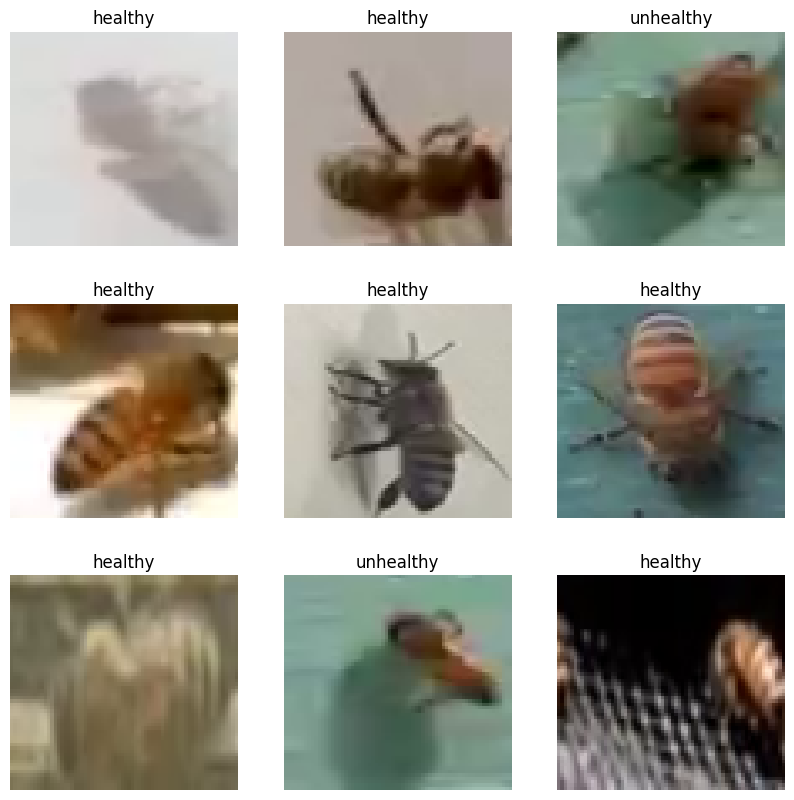

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in raw_train_dataset.take(1):
  #print(labels.numpy())
  for i in range(9):
    # Setting a graph plot for 3x3 images
    ax = plt.subplot(3, 3, i + 1)

    # Plotting the image. All images are converted to numpy and later casted to uint8
    plt.imshow(images[i].numpy().astype("uint8"))

    # Labels are converted from tensor to numpy numbers
    label = int(labels[i].numpy())
    plt.title(class_names[label])

    plt.axis("off")

In [ ]:
!mkdir ./train/unhealthy_train
!mkdir ./train/unhealthy_train/unhealthy
!cp ./train/unhealthy/* ./train/unhealthy_train/unhealthy/

mkdir: cannot create directory ‘./train/unhealthy_train’: File exists


In [ ]:
!ls -1 ./train/unhealthy_train/unhealthy/ | wc -l

1209


In [ ]:
new_train_unhealthy = "./train/unhealthy_train/"

In [ ]:
# Creating Test Dataset
unhealthy_dataset = tf.keras.utils.image_dataset_from_directory(
  # Give Directory's path
  new_train_unhealthy,

  # Set to Inferred so the system automatically infers the labels
  labels='inferred',

  # (Refer to Documentation) Labels are encoded as 0 and 1
  label_mode="int",
  class_names=class_names,

  # Set to RGB since JPG images are in RGB
  color_mode="rgb",

  # Load in batches of 'batch_size'
  batch_size=batch_size,

  # Standarizes all images into the size put below
  image_size=(img_width, img_height),

  # Sets the random generator seed into a custom number
  seed=seed,

  # Tells if data should be shuffled or not
  shuffle=True,
)

Found 1209 files belonging to 2 classes.


In [ ]:
def change_labels(iamge, label):
  new_label = label - 1
  return image, new_label

unhealthy_dataset = unhealthy_dataset.map(change_labels)

In [ ]:
from collections import Counter

label_counts = Counter()

for images, labels in unhealthy_dataset:
  label_counts.update(labels.numpy())

for class_name, count in zip(class_names, label_counts.values()):
  print(f"{class_name}: {count}")

healthy: 1209


# Preprocessing

In [ ]:
# Verificar el contenido del dataset
for images, labels in raw_train_dataset.take(1):
    print(images.shape)  # Salida: (32, 256, 256, 3)
    print(labels.shape)  # Salida: (32,)

(128, 64, 68, 3)
(128,)


In [ ]:
# Crear un diccionario para almacenar los subdatasets de cada clase
subdatasets = {}

# Iterar sobre cada clase
for class_name in class_names:
    # Filtrar el dataset original por la clase actual
    subset = raw_train_dataset.filter(lambda x, y: tf.math.equal(y[0], class_names.index(class_name)))
    # Almacenar el subdataset en el diccionario
    subdatasets[class_name] = subset

# Verificar los subdatasets creados
for class_name, subset in subdatasets.items():
    print(f"Subdataset para la clase {class_name}:")
    for images, labels in subset.take(1):
        print(f"Número de imágenes: {len(images)}")

Subdataset para la clase healthy:
Número de imágenes: 128
Subdataset para la clase unhealthy:
Número de imágenes: 128


In [ ]:
# Definir las transformaciones de data augmentation que deseas aplicar
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    # Agrega aquí otras transformaciones según sea necesario
])


class_name = "unhealthy"
augmented_subset = subdatasets[class_name].map(lambda x, y: (data_augmentation(x, training=True), y))

# Verificar el contenido del subset aumentado
for images, labels in augmented_subset.take(1):
    print("Número de imágenes en el subset aumentado:", len(images))

Número de imágenes en el subset aumentado: 128


In [ ]:
# Contar el número de imágenes en el subset original
original_count = len(list(subdatasets[class_name].as_numpy_iterator()))

# Contar el número de imágenes en el subset aumentado
augmented_count = len(list(augmented_subset.as_numpy_iterator()))

# Calcular la diferencia en el número de imágenes
aumento = augmented_count - original_count

print("Número de imágenes en el subset original:", original_count)
print("Número de imágenes en el subset aumentado:", augmented_count)
print("Aumento en el número de imágenes:", aumento)

Número de imágenes en el subset original: 7
Número de imágenes en el subset aumentado: 8
Aumento en el número de imágenes: 1


## Data Augmentation

In [ ]:
from collections import Counter

label_counts = Counter()

for images, labels in raw_train_dataset:
  label_counts.update(labels.numpy())

for class_name, count in zip(class_names, label_counts.values()):
  print(f"{class_name}: {count}")

"""num_images = 0
healthy = 0
unhealthy = 0
shapes = []
for images, labels in raw_train_dataset:
    shapes.append(images.shape)
    print(labels)
    num_images += images.shape[0]

print(len(shapes))
print(shapes)

print("Número total de imágenes:", num_images)"""

healthy: 954
unhealthy: 2082


'num_images = 0\nhealthy = 0\nunhealthy = 0\nshapes = []\nfor images, labels in raw_train_dataset:\n    shapes.append(images.shape)\n    print(labels)\n    num_images += images.shape[0]\n\nprint(len(shapes))\nprint(shapes)\n\nprint("Número total de imágenes:", num_images)'

In [ ]:
# Crear un diccionario para almacenar los subsets
subsets = {class_name: [] for class_name in class_names}
count = 0
# Separar las imágenes por etiquetas
for images, labels in raw_train_dataset:
    for i in range(len(images)):
        label = labels[i].numpy()  # Convertir el tensor a un entero
        class_name = class_names[label]
        subsets[class_name].append(images[i].numpy())

# Convertir listas a datasets de TensorFlow
for class_name in subsets:
    subsets[class_name] = tf.data.Dataset.from_tensor_slices(np.array(subsets[class_name]))

#Obtaining a subset of the unhealthy bees in train dataset
unhealthy_subset = raw_train_dataset.filter(lambda images,labels: tf.reduce_any(labels==0))

# Verificar los subsets creados
for image in unhealthy_subset:
    count += 1

print(count)

24


In [ ]:
#Augmenting the unhealthy subset
random_horizontal = tf.keras.layers.RandomFlip(mode="horizontal")

flipped_unhealthy_subset = unhealthy_subset.map(lambda x: (random_horizontal(x, training=True)))

almost_balanced_raw_dataset = raw_train_dataset.concatenate(flipped_unhealthy_subset)

TypeError: Incompatible dataset elements:
  (TensorSpec(shape=(None, 64, 68, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None)) vs.   TensorSpec(shape=(64, 68, 3), dtype=tf.float32, name=None)